Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Defining Higuchi Algorithm Function to compute the Fractal Dimension

In [ ]:


def higuchi_fractal_dimension(time_series, kmax):
    """
    - kmax: The maximum interval for constructing time series subsets (typically a small integer).

    Returns:
    - fractal_dim: Estimated fractal dimension of the time series.
    - k_values: List of k values used in the calculation.
    - Lk: List of L(k) values for each k.
    """
    N = len(time_series)
    Lk = np.zeros(kmax)  # Array to hold average curve lengths for each interval k

    for k in range(1, kmax + 1):
        Lm = np.zeros(k)  # Array to hold curve lengths for each m within interval k
        for m in range(k):
            # Create new time series with interval k and starting point m
            length = 0
            num_segments = int((N - m) / k)
            for j in range(1, num_segments):
                length += abs(time_series[m + j * k] - time_series[m + (j - 1) * k])
            # Normalize by (N - 1) / (k * num_segments) to keep length scale-invariant
            Lm[m] = length * (N - 1) / (k * num_segments * k)
        # Average Lm over all m to get L(k)
        Lk[k - 1] = np.mean(Lm)

    # Compute fractal dimension as the slope of log-log plot of Lk vs k
    ln_k = np.log(np.arange(1, kmax + 1))
    ln_Lk = np.log(Lk)
    slope, _ = np.polyfit(ln_k, ln_Lk, 1)

    fractal_dim = -slope  # The fractal dimension is the negative of the slope
    return fractal_dim, np.arange(1, kmax + 1), Lk


Taking Time Series Data

In [ ]:
# Random Walk (Brownian Motion)
# time series model with a fractal-like structure
#time_series = np.cumsum(np.random.randn(1000))

# White Noise
# A random, uncorrelated sequence. This should give a low fractal dimension since it lacks self-similar structure.
#time_series = np.random.randn(1000)

# Sine Wave (Periodic Signal)
# Generates a regular, repeating signal, which may have a fractal dimension close to 1.

#t = np.linspace(0, 10 * np.pi, 1000)
#time_series = np.sin(t)

# Loading from a CSV File

import pandas as pd
data = pd.read_csv("Gold.csv")
data.head()
time_series = data["VALUE"].values


#Electric_Production from keggle
#Daily gold fixing price (10:30 am London time)
# in London Bullion Market in US dollars per Troy ounce
# from January 3, 1995 to November 10, 2016 from website of texas university


Max interval, adjust as needed

In [ ]:

kmax = 10

Plotting the time series

Text(0, 0.5, 'Value')

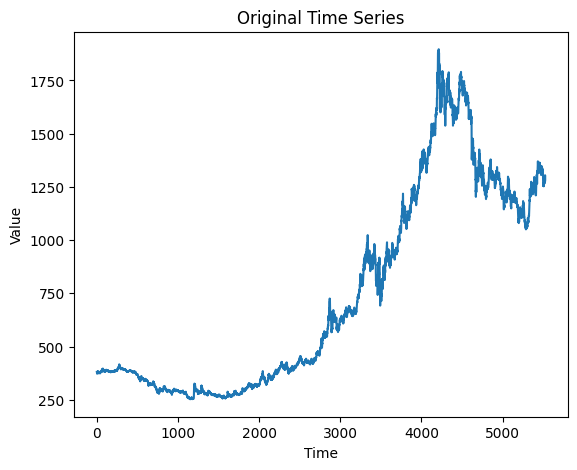

In [ ]:

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(time_series)
plt.title("Original Time Series")
plt.xlabel("Time")
plt.ylabel("Value")

Computing the fractal dimension

In [ ]:
fractal_dimension, k_values, Lk_values = higuchi_fractal_dimension(time_series, kmax)
print("Estimated Fractal Dimension:", fractal_dimension)

Estimated Fractal Dimension: 1.4847597685540386


Plotting the log-log plot of L(k) vs. k

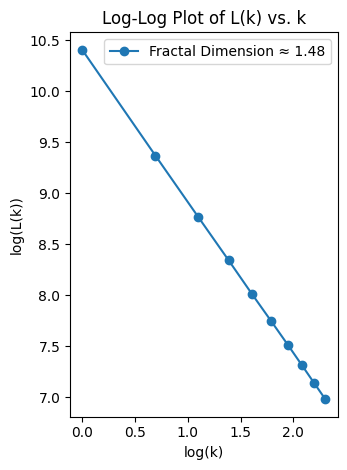

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(np.log(k_values), np.log(Lk_values), 'o-', label=f"Fractal Dimension ≈ {fractal_dimension:.2f}")
plt.title("Log-Log Plot of L(k) vs. k")
plt.xlabel("log(k)")
plt.ylabel("log(L(k))")
plt.legend()
plt.tight_layout()
plt.show()

